# Word Cloud of Spam and Non-Spam emails

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
print("Spam count: ", len(df.loc[df.spam == 1]))
print("Not spam count: ", len(df.loc[df.spam == 0]))

Spam count:  1368
Not spam count:  4360


In [6]:
print(df.shape)

(5728, 2)


In [7]:
df = df.drop_duplicates()
df = df.reset_index(inplace = False)[['text', 'spam']]

In [8]:
print(df.shape)

(5695, 2)


In [10]:
clean_desc = []
for w in range(len(df.text)):
    desc = df['text'][w].lower()
    
    # remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    # remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
    
# assign the cleaned descriptions to the data frame
df['text'] = clean_desc

df.head(3)

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1


In [12]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 
              'on', 're', 'new', 'subject']

In [16]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000, 
                     min_font_size = 20).generate(str(df['text']))

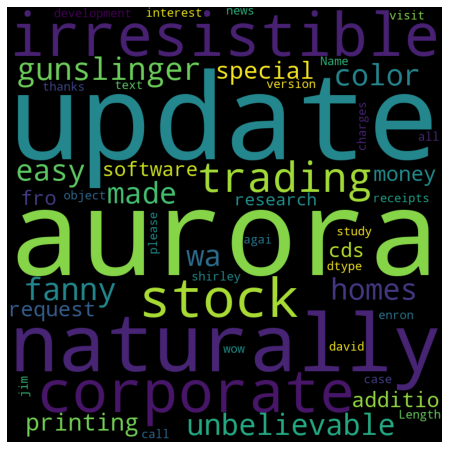

In [17]:
# plot the word cloud
fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
df1 = df[df['spam'] == 1]

In [20]:
df1.head()

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject color printing special request additio...,1
4,subject do not have money get software cds fro...,1


In [21]:
df2 = df[df['spam'] == 0]

In [23]:
df2.head()

,text,spam
1368,subject hello guys i m bugging you for your co...,0
1369,subject sacramento weather station fyi forward...,0
1370,subject from the enron india newsdesk jan th n...,0
1371,subject re powerisk your invitation angelika t...,0
1372,subject re resco database and customer capture...,0


In [24]:
# Spam word cloud
spam_wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000, 
                     min_font_size = 20).generate(str(df1['text']))

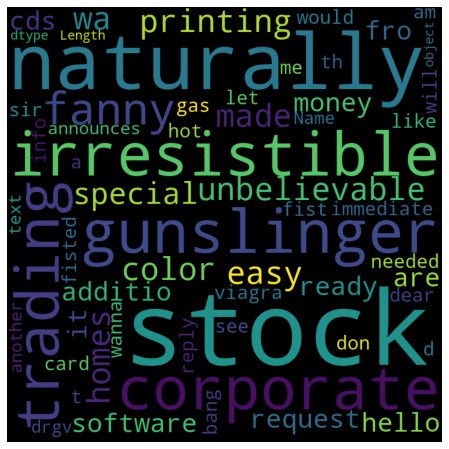

In [25]:
# plot the word cloud
fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

In [26]:
# Not spam word cloud
not_spam_wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000, 
                     min_font_size = 20).generate(str(df2['text']))

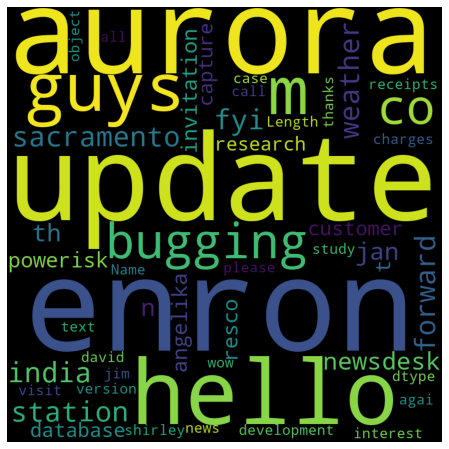

In [27]:
# plot the word cloud
fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(not_spam_wordcloud)
plt.axis('off')
plt.show()